# Анализ публикации открытых данных на общероссийском портале открытых данных data.gov.ru

Эта тетрадка создана для анализа набора данных каталога data.gov.ru

Для работы необходимо распаковать файл dataset-registry.zip в папке data

In [1]:
import requests
import json
import datetime
import pandas as pd
import numpy as np
from IPython.display import clear_output

In [2]:
df = pd.read_csv('data/dataset-registry.csv', sep=';', parse_dates=[8,9, 10])

In [52]:
df

,Название набора,Идентификатор набор,Описание набора данных,Владелец набораданных,Контактное лицо,Телефонный номер ответственного лица,Адрес электронной почты ответственного лица,Формат,Дата актуальности набора,Дата первой публикации набора,...,Рубрика,Уровень власти ответственного органа - владельца набора,Количество просмотров,Количество скачиваний,Ключевые слова,Общая сумма пользовательских оценок,Положительные пользовательские оценки,Негативные пользовательские оценки,Ссылка на версию набора,Ссылка на структуру набора
0,Список МФЦ,7710349494-mfclist,Список сайтов органов государственной власти р...,Министерство экономического развития Российско...,Дергачева Виктория Сергеевна,8 495 870 29 21 (10931),dergachevavs@economy.gov.ru,csv,2021-06-30,2012-01-12,...,Government,Федеральные,18083,"Список МФЦ, многофункциональные центры, реестр...",1410.0,60.0,355.0,-295.0,https://xn--d1achjhdicc8bh4h.xn--p1ai/opendata...,http://data.gov.ru/opendata/7710349494-mfclist...
1,Перечень подведомственных организаций,7710474375-perechenpodved,Сведения из перечня подведомственных организаций,"Министерство цифрового развития, связи и массо...","Бондарь Игорь Викторович, заместитель начальни...","+7 495 771-80-00, доб. 8331",i.bondar@minsvyaz.ru,csv,2019-12-16,2013-06-21,...,Government,Федеральные,4100,"Перечень подведомственных организаций, подведо...",166.0,-26.0,230.0,-256.0,http://data.gov.ru/opendata/7710474375-pereche...,http://data.gov.ru/opendata/7710474375-pereche...
2,Сведения о вакантных должностях государственно...,7710474375-svedovak,Информация о вакантных должностях государствен...,"Министерство цифрового развития, связи и массо...","Корнейчук Юлия Владимировна, заместитель дирек...",+7 495 771-80-00 доб. 89-88,yu.korneychuk@minsvyaz.ru,csv,2019-12-16,2013-06-20,...,Government,Федеральные,5184,"вакансии, поиск кандидатов, подбор кадров, кад...",303.0,-43.0,169.0,-212.0,http://data.gov.ru/opendata/7710474375-svedova...,http://data.gov.ru/opendata/7710474375-svedova...
3,"Реестр аккредитованных организаций, осуществля...",7710474375-registergosaccred,Сведения из реестра об аккредитованных организ...,"Министерство цифрового развития, связи и массо...",Евстигнеева Татьяна Павловна,+74957718848,accred@minsvyaz.ru,csv,2019-12-16,2013-07-12,...,Government,Федеральные,9410,"аккредитация, аккредитация организаций, деятел...",483.0,-64.0,219.0,-283.0,http://data.gov.ru/opendata/7710474375-registe...,http://data.gov.ru/opendata/7710474375-registe...
4,Сведения о доходах от услуг связи (статистичес...,7710474375-dohodiuslugsvyazi,"Сведения о доходах от услуг связи всего, доход...","Министерство цифрового развития, связи и массо...",Цыновкина Светлана Сергеевна,+7 495 771-80-00 доб. 83-23,s.zynovkina@minsvyaz.ru,csv,2019-12-16,2013-06-25,...,Government,Федеральные,3582,"Связь, статистика, доходы",359.0,2.0,153.0,-151.0,http://data.gov.ru/opendata/7710474375-dohodiu...,http://data.gov.ru/opendata/7710474375-dohodiu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23997,"Перечень культурных ценностей, предназначенных...",7705851331-confiscation,"Перечень культурных ценностей, в том числе рел...",Министерство культуры Российской Федерации,Маркова Дарья Юрьевна,"+7(495) 629-10-10, доб. 1460",daria.markova@mkrf.ru,json,2020-10-21,2020-03-21,...,NaN,Федеральные,475,"музеи, министерство",0.0,-7.0,73.0,-80.0,https://opendata.mkrf.ru/opendata/7705851331-c...,https://opendata.mkrf.ru/opendata/7705851331-c...
23998,"Перечень культурных ценностей, предназначенных...",7705851331-confiscation,"Перечень культурных ценностей, в том числе рел...",Министерство культуры Российской Федерации,Маркова Дарья Юрьевна,"+7(495) 629-10-10, доб. 1460",daria.markova@mkrf.ru,json,2020-10-21,2020-03-21,...,NaN,Федеральные,271,"музеи, министерство",0.0,1.0,72.0,-71.0,https://opendata.mkrf.ru/opendata/7705851331-c...,https://opendata.mkrf.ru/opendata/7705851331-c...
23999,Число лиц;Отсутствие в помещении: Присутствующ...,7708234640-mpn

Подсчитаем сколько наборов данных было опубликовано федеральными органами власти после 2019 года

In [65]:
ydf = df[df['Уровень власти ответственного органа - владельца набора'] == 'Федеральные']
len(ydf.index)

owners = df[df['Уровень власти ответственного органа - владельца набора'] == 'Федеральные']['Владелец набораданных'].unique()
len(owners)
n = 0
for o in owners:
    odf = df[df['Владелец набораданных'] == o]
    odf = odf[odf['Дата первой публикации набора'].dt.year > 2019]
    if len(odf.index) > 0:
        print(o, len(odf.index))
        n += 1
print(n)


Федеральное агентство по рыболовству 3
Федеральная служба по ветеринарному и фитосанитарному надзору 2
Федеральная служба по надзору в сфере природопользования 7
Федеральная налоговая служба 2
Министерство культуры Российской Федерации 26
Федеральная служба государственной регистрации, кадастра и картографии 43
6


Подсчитаем статистику по годам даты первой публикации набора данных

In [4]:
years = df['Дата первой публикации набора'].map(lambda t: t.year ).unique()
years.sort()
arr = []
for year in years:
    ydf = df[df['Дата первой публикации набора'].dt.year == year]
    arr.append([len(ydf.index)])
        
columns = ['num_datasets']
rows = years    
data = np.array(arr)
ydf = pd.DataFrame(data=data, index=rows, columns=columns)
ydf


,num_datasets
2008.0,1
2010.0,1
2011.0,2
2012.0,41
2013.0,1477
2014.0,1902
2015.0,2975
2016.0,4358
2017.0,8218
2018.0,3571


Визуализируем итоговую статистику в графике

<AxesSubplot:>

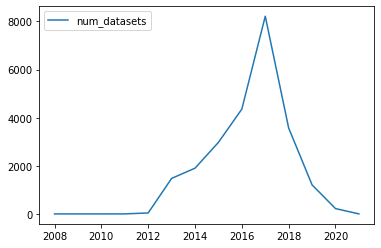

In [5]:
ydf.plot()

Подсчитаем число наборов данных у которых отсутствует ссылка на их структуру

In [6]:
num_no_data = len(df[df['Ссылка на структуру набора'].isnull()].index)

In [16]:
formats = df['Формат'].unique()
formats
years = df['Дата первой публикации набора'].map(lambda t: t.year ).unique()
years.sort()
arr = []

arr = []
for value in formats:
    ydf = df[df['Формат'] == value]
    for year in years:
        ydf2 = ydf[ydf['Дата первой публикации набора'].dt.year == year]
        arr.append([value, year, len(ydf2.index)])
        
columns = ['format','year', 'num_datasets']
for row in arr:
    print('%s\t%s\t%s' % (row[0], row[1], row[2]))
rows = formats
data = np.array(arr)
formats_ydf = pd.DataFrame(data=data, columns=columns)
#formats_ydf


csv	2008.0	0
csv	2010.0	1
csv	2011.0	2
csv	2012.0	26
csv	2013.0	1187
csv	2014.0	1643
csv	2015.0	2226
csv	2016.0	3518
csv	2017.0	2793
csv	2018.0	2733
csv	2019.0	1051
csv	2020.0	152
csv	2021.0	2
csv	nan	0
xml	2008.0	0
xml	2010.0	0
xml	2011.0	0
xml	2012.0	7
xml	2013.0	105
xml	2014.0	74
xml	2015.0	275
xml	2016.0	152
xml	2017.0	5116
xml	2018.0	547
xml	2019.0	38
xml	2020.0	0
xml	2021.0	0
xml	nan	0
nan	2008.0	0
nan	2010.0	0
nan	2011.0	0
nan	2012.0	0
nan	2013.0	0
nan	2014.0	0
nan	2015.0	0
nan	2016.0	0
nan	2017.0	0
nan	2018.0	0
nan	2019.0	0
nan	2020.0	0
nan	2021.0	0
nan	nan	0
zip	2008.0	0
zip	2010.0	0
zip	2011.0	0
zip	2012.0	8
zip	2013.0	10
zip	2014.0	12
zip	2015.0	15
zip	2016.0	20
zip	2017.0	5
zip	2018.0	9
zip	2019.0	26
zip	2020.0	15
zip	2021.0	0
zip	nan	0
json	2008.0	0
json	2010.0	0
json	2011.0	0
json	2012.0	0
json	2013.0	1
json	2014.0	123
json	2015.0	417
json	2016.0	368
json	2017.0	144
json	2018.0	132
json	2019.0	56
json	2020.0	15
json	2021.0	0
json	nan	0
gz	2008.0	1
gz	2010.0	0
gz	2011.0	0


In [9]:

for value in formats:
    ydf = df[df['Формат'] == value]
    arr.append([len(ydf.index)])

,Название набора,Идентификатор набор,Описание набора данных,Владелец набораданных,Контактное лицо,Телефонный номер ответственного лица,Адрес электронной почты ответственного лица,Формат,Дата актуальности набора,Дата первой публикации набора,...,Рубрика,Уровень власти ответственного органа - владельца набора,Количество просмотров,Количество скачиваний,Ключевые слова,Общая сумма пользовательских оценок,Положительные пользовательские оценки,Негативные пользовательские оценки,Ссылка на версию набора,Ссылка на структуру набора
949,Сведения о подведомственных государственных уч...,8901012609-0,Сведения о подведомственных государственных уч...,Аппарат Губернатора Ямало-Ненецкого автономног...,Иванов Эдуард Анатольевич,+7(34922)2-27-55,eaivanov@yanao.ru,xlsx,2019-06-13,2014-06-17,...,Government,Региональные,4151,"ЯНАО, Аппарат Губернатора ЯНАО",501.0,-30.0,105.0,-135.0,http://data.gov.ru/opendata/8901012609-0/data-...,http://data.gov.ru/opendata/8901012609-0/struc...
1426,Перечень подведомственных организаций,2606000563-podved,"Перечень организаций, подчиняющихся администра...",Администрация Грачевского муниципального район...,"Цанян Олег Георгиевич, специалист 1 категории",+7(86540)4-11-91,v.026@mail.ru,xlsx,2020-08-10,2013-05-09,...,Government,Муниципальные,761,подведомственные организации,5.0,25.0,84.0,-59.0,http://data.gov.ru/opendata/2606000563-podved/...,http://data.gov.ru/opendata/2606000563-podved/...
1882,Сведения о подведомственных учреждениях,5260248771-podvedomstvennye-organizatsii,Контактные данные организаций,Министерство экологии и природных ресурсов Ниж...,Сергеева Ольга Владимировна,+7 (831) 430-36-33,press@eco.kreml.nnov.ru,xlsx,2019-01-14,2015-03-04,...,Ecology,Региональные,1088,"подведомственные, экология",19.0,-13.0,54.0,-67.0,http://data.gov.ru/opendata/5260248771-podvedo...,http://data.gov.ru/opendata/5260248771-podvedo...
2043,"Информация о населенных пунктах, расположенных...",3116004120-rasstoiynie,"Список населенных пунктов, расположенных на те...",Администрация Венгеровского сельского поселени...,Курганова Екатерина Сергеевна,+7 472 455 1171,Ek.Kur.2014@yandex.ru,xlsx,2018-05-29,2015-06-04,...,Economics,Муниципальные,1244,"населенные пункты, население",29.0,-42.0,67.0,-109.0,http://data.gov.ru/opendata/3116004120-rasstoi...,http://data.gov.ru/opendata/3116004120-rasstoi...
2112,Список детских садов и организаций дополнитель...,3116001432-kindergarten,Контактная информация детских садов и дополнит...,Управление образования администрации Ракитянск...,Журавель Надежда Викторовна,+7 472 455 7498,ghur240404@yandex.ru,xlsx,2018-05-30,2015-06-17,...,Education,Муниципальные,2349,контактные данные организаций,46.0,-10.0,97.0,-107.0,NaN,http://data.gov.ru/opendata/3116001432-kinderg...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747,Сведения об объёмах финансового обеспечения и ...,2312161984-programfin,Информация о достижении показателей (индикатор...,Министерство природных ресурсов Краснодарского...,Сакса Вячеслав Юрьевич,+7 861 293 7801 (121),mprkk@krasnodar.ru,xlsx,2019-12-31,2019-03-15,...,Ecology,Региональные,259,Леса Кубани,32.0,-1.0,1.0,-2.0,http://data.gov.ru/opendata/2312161984-program...,http://data.gov.ru/opendata/2312161984-program...
21864,"Сведения об имуществе, включенного в раздел «М...",8902002956-jilfond,"Сведения об имуществе, расположенного на терри...",Администрация муниципального образования город...,Пухлякова Оксана Александровна,+7 349 925 7070,pukhlyakovaoa@adm.lbt.yanao.ru,xlsx,2021-05-28,2019-05-30,...,Construction,Муниципальные,444,жилищный фонд,16.0,-12.0,35.0,-47.0,http://data.gov.ru/opendata/8902002956-jilfond...,http://data.gov.ru/opendata/8902002956-jilfond...
21987,Центры психологической помощи,8904028004-centrpsihpomochi,Центры психологической помощи,Администрация муниципального образования город...,Невесёлая Лариса Наильевна,+7 349 425 0112,neveselaya.ln@nur.yanao.ru,xlsx,2020-06-25,2019-09-07,...,Health,Муниципальные,281,психологическ

In [49]:
n = 0
summ = 0
ydf2 = df[df['Дата первой публикации набора'].dt.year > 2019]
for dt, row in ydf2.iterrows():
    url = row[20]
    if isinstance(url, str) and url[0:4] == 'http':
        if url.find('http://data.gov.ru') > -1:
            url = 'https' + url[4:]
        try:
            print(url)
            req = requests.head(url)
            rsize = req.headers['Content-Length']
            summ += int(rsize)
            print(rsize)
        except KeyError:
            n += 1
            print(0)

summ

https://data.gov.ru/opendata/2918003087-sport/data-20180328T0654-structure-20180328T0654.csv
835
https://data.gov.ru/opendata/2014007948-accommodationfacilities/data-20201001T0749-structure-20201001T0749.csv
0
https://data.gov.ru/opendata/5254011693-reestrsonko/data-20210420T1126-structure-20200113T0745.csv
0
https://data.gov.ru/opendata/7702679523-perechenmd/data-20200113T1315-structure-20200113T1315.csv
0
https://data.gov.ru/opendata/7702679523-subpolntu/data-20200113T1315-structure-20200113T1315.csv
3702
https://data.gov.ru/opendata/7702679523-funcpolntu/data-20200113T1330-structure-20200113T1330.csv
2053
https://data.gov.ru/opendata/5603004967-uo/data-20200114T0515-structure-20200114T0515.csv
537
http://okrug-wyksa.ru/netcat_files/userfiles/OksanaK/dokumenty/otkrytye%20dannye/punkt%2026.csv
3452
http://okrug-wyksa.ru/netcat_files/userfiles/OksanaK/dokumenty/otkrytye%20dannye/punkt%2027.csv
64695
http://okrug-wyksa.ru/netcat_files/userfiles/OksanaK/dokumenty/otkrytye%20dannye/punkt%

0
https://data.gov.ru/opendata/8609012600-retail-stores-food-non-food-commodity-city-rainbow/data-20200115T1552-structure-20200115T1552.csv
0
https://data.gov.ru/opendata/8604013215-register-of-public-organizations-operating-in-the-territory/data-20200218T1225-structure-20200218T1225.csv
0
https://data.gov.ru/opendata/8601018399-the-registry-of-permissions-to-input-of-2019/data-20200114T1715-structure-20200114T1712.csv
0
https://data.gov.ru/opendata/8601018399-register-of-building-permits-in-2012/data-20210111T1756-structure-20210111T1754.csv
0
https://data.gov.ru/opendata/8614002149-information-about-the-administrative-territorial-division-of/data-20210502T2030-structure-20210502T2028.csv
3687
https://data.gov.ru/opendata/8604013215-the-registry-of-cultural-events/data-20200421T1533-structure-20200421T1530.csv
0
https://data.gov.ru/opendata/8604013215-information-about-the-actual-number-of-municipal-employees-o/data-20200514T1811-structure-20200514T1808.csv
2064
https://data.gov.ru/op

0
https://data.gov.ru/opendata/6166059867-pticy/data-20201014T1338-structure-20201014T1338.csv
9265
https://data.gov.ru/opendata/7708523530-byudzhet/data-20210411T0523-structure-20210411T0523.csv
3168
https://data.gov.ru/opendata/0721018100-harakteristika-lesov-po-celevomu-naznacheniu/data-20201223T1134-structure-20201223T1134.csv
4248
https://data.gov.ru/opendata/0721018100-reestr-lesopolzovatelei-dolgnikov-po-plate-za-ispolzovanie-lesov/data-20201223T1217-structure-20201223T1217.csv
0
https://opendata.mkrf.ru/opendata/7705851331-organizations/data-2-structure-2.json.zip
25773532
https://opendata.mkrf.ru/opendata/7705851331-confiscation/data-6-structure-1.json
44820
https://opendata.mkrf.ru/opendata/7705851331-organizations/data-2-structure-2.json.zip
25773532
https://opendata.mkrf.ru/opendata/7705851331-confiscation/data-6-structure-1.json
44820
https://opendata.mkrf.ru/opendata/7705851331-organizations/data-2-structure-2.json.zip
25773532
https://opendata.mkrf.ru/opendata/7705851331

405650586

In [50]:
n

48